In [21]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2


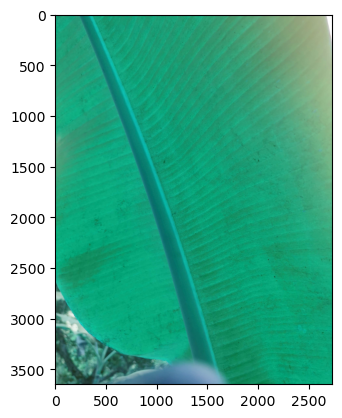

In [22]:
Train_DIR=r'C:\Python310\projects\BANANAdataset\train'
Categories=['healthy','sigatoka','cordana','pestalotiopsis']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

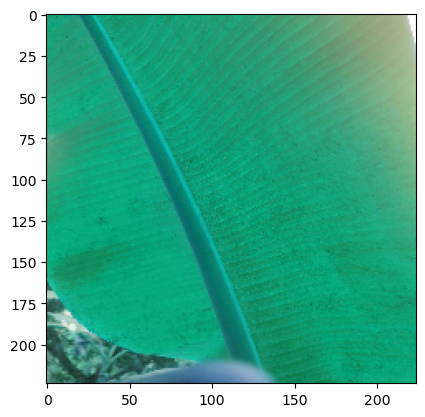

In [23]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()


#PREPARATION OF THE MODEL

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [25]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Python310\projects\BANANAdataset\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Python310\projects\BANANAdataset\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 624 images belonging to 4 classes.
Found 153 images belonging to 4 classes.


In [26]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [28]:
checkpoint=ModelCheckpoint(r'C:\Python310\projects\BANANAdataset',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]


In [29]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)


C:\Users\prana\AppData\Local\Temp\ipykernel_26572\4232801000.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
 2/39 [>.............................] - ETA: 1:20 - loss: 1.3612 - accuracy: 0.2500    

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.9823 - accuracy: 0.5689
Epoch 1: val_loss improved from inf to 1.02356, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 136s 4s/step - loss: 0.9823 - accuracy: 0.5689 - val_loss: 1.0236 - val_accuracy: 0.4931
Epoch 2/30
 2/39 [>.............................] - ETA: 1:27 - loss: 0.8745 - accuracy: 0.5000

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.6699
Epoch 2: val_loss did not improve from 1.02356
39/39 [==============================] - 133s 3s/step - loss: 0.8518 - accuracy: 0.6699 - val_loss: 1.0863 - val_accuracy: 0.5417
Epoch 3/30
39/39 [==============================] - ETA: 0s - loss: 0.7927 - accuracy: 0.6955
Epoch 3: val_loss did not improve from 1.02356
39/39 [==============================] - 114s 3s/step - loss: 0.7927 - accuracy: 0.6955 - val_loss: 1.0486 - val_accuracy: 0.5764
Epoch 4/30
39/39 [==============================] - ETA: 0s - loss: 0.7374 - accuracy: 0.6971
Epoch 4: val_loss improved from 1.02356 to 1.01440, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 115s 3s/step - loss: 0.7374 - accuracy: 0.6971 - val_loss: 1.0144 - val_accuracy: 0.5486
Epoch 5/30


C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.6434 - accuracy: 0.7452
Epoch 5: val_loss improved from 1.01440 to 0.98194, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 118s 3s/step - loss: 0.6434 - accuracy: 0.7452 - val_loss: 0.9819 - val_accuracy: 0.6181
Epoch 6/30
 1/39 [..............................] - ETA: 1:27 - loss: 0.7493 - accuracy: 0.7500

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.5483 - accuracy: 0.7901
Epoch 6: val_loss improved from 0.98194 to 0.72038, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 117s 3s/step - loss: 0.5483 - accuracy: 0.7901 - val_loss: 0.7204 - val_accuracy: 0.6806
Epoch 7/30
 3/39 [=>............................] - ETA: 1:29 - loss: 0.4730 - accuracy: 0.8542

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.7788
Epoch 7: val_loss improved from 0.72038 to 0.71648, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 162s 4s/step - loss: 0.5338 - accuracy: 0.7788 - val_loss: 0.7165 - val_accuracy: 0.6250
Epoch 8/30
 8/39 [=====>........................] - ETA: 1:24 - loss: 0.5500 - accuracy: 0.7656

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.8125
Epoch 8: val_loss improved from 0.71648 to 0.68429, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 122s 3s/step - loss: 0.4531 - accuracy: 0.8125 - val_loss: 0.6843 - val_accuracy: 0.7500
Epoch 9/30
 1/39 [..............................] - ETA: 1:28 - loss: 0.2845 - accuracy: 0.8750

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.4263 - accuracy: 0.8349
Epoch 9: val_loss did not improve from 0.68429
39/39 [==============================] - 130s 3s/step - loss: 0.4263 - accuracy: 0.8349 - val_loss: 0.7404 - val_accuracy: 0.6597
Epoch 10/30
39/39 [==============================] - ETA: 0s - loss: 0.3853 - accuracy: 0.8494
Epoch 10: val_loss improved from 0.68429 to 0.64546, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 119s 3s/step - loss: 0.3853 - accuracy: 0.8494 - val_loss: 0.6455 - val_accuracy: 0.7500
Epoch 11/30


C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.3662 - accuracy: 0.8606
Epoch 11: val_loss did not improve from 0.64546
39/39 [==============================] - 116s 3s/step - loss: 0.3662 - accuracy: 0.8606 - val_loss: 0.7300 - val_accuracy: 0.7431
Epoch 12/30
39/39 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.8846
Epoch 12: val_loss improved from 0.64546 to 0.57769, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 119s 3s/step - loss: 0.3289 - accuracy: 0.8846 - val_loss: 0.5777 - val_accuracy: 0.8125
Epoch 13/30
 6/39 [===>..........................] - ETA: 1:22 - loss: 0.2185 - accuracy: 0.9375

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.2990 - accuracy: 0.8974
Epoch 13: val_loss did not improve from 0.57769
39/39 [==============================] - 131s 3s/step - loss: 0.2990 - accuracy: 0.8974 - val_loss: 1.2572 - val_accuracy: 0.7361
Epoch 14/30
39/39 [==============================] - ETA: 0s - loss: 0.3371 - accuracy: 0.8830
Epoch 14: val_loss improved from 0.57769 to 0.38630, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 119s 3s/step - loss: 0.3371 - accuracy: 0.8830 - val_loss: 0.3863 - val_accuracy: 0.8472
Epoch 15/30
 4/39 [==>...........................] - ETA: 1:22 - loss: 0.2418 - accuracy: 0.9062

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9199
Epoch 15: val_loss improved from 0.38630 to 0.37948, saving model to C:\Python310\projects\BANANAdataset


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 117s 3s/step - loss: 0.2273 - accuracy: 0.9199 - val_loss: 0.3795 - val_accuracy: 0.8611
Epoch 16/30
 3/39 [=>............................] - ETA: 1:28 - loss: 0.0684 - accuracy: 1.0000

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.3053 - accuracy: 0.8846
Epoch 16: val_loss did not improve from 0.37948
39/39 [==============================] - 239s 6s/step - loss: 0.3053 - accuracy: 0.8846 - val_loss: 0.4176 - val_accuracy: 0.8403
Epoch 17/30
39/39 [==============================] - ETA: 0s - loss: 0.2457 - accuracy: 0.9071
Epoch 17: val_loss did not improve from 0.37948
39/39 [==============================] - 114s 3s/step - loss: 0.2457 - accuracy: 0.9071 - val_loss: 0.4689 - val_accuracy: 0.8194
Epoch 18/30
39/39 [==============================] - ETA: 0s - loss: 0.2613 - accuracy: 0.9054
Epoch 18: val_loss did not improve from 0.37948
39/39 [==============================] - 118s 3s/step - loss: 0.2613 - accuracy: 0.9054 - val_loss: 0.8786 - val_accuracy: 0.7292
Epoch 19/30
39/39 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.9247
Epoch 19: val_loss did not improve from 0.37948
39/39 [==============================] - 121s 3s/s

INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


INFO:tensorflow:Assets written to: C:\Python310\projects\BANANAdataset\assets


39/39 [==============================] - 128s 3s/step - loss: 0.1343 - accuracy: 0.9503 - val_loss: 0.3510 - val_accuracy: 0.8889
Epoch 26/30
14/39 [=========>....................] - ETA: 1:10 - loss: 0.1099 - accuracy: 0.9688

C:\Users\prana\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\prana\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:812: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


39/39 [==============================] - ETA: 0s - loss: 0.1336 - accuracy: 0.9551
Epoch 26: val_loss did not improve from 0.35105
39/39 [==============================] - 140s 4s/step - loss: 0.1336 - accuracy: 0.9551 - val_loss: 0.5669 - val_accuracy: 0.8542
Epoch 27/30
39/39 [==============================] - ETA: 0s - loss: 0.1712 - accuracy: 0.9439 
Epoch 27: val_loss did not improve from 0.35105
39/39 [==============================] - 440s 12s/step - loss: 0.1712 - accuracy: 0.9439 - val_loss: 0.4965 - val_accuracy: 0.8611
Epoch 28/30
39/39 [==============================] - ETA: 0s - loss: 0.1519 - accuracy: 0.9455
Epoch 28: val_loss did not improve from 0.35105
39/39 [==============================] - 121s 3s/step - loss: 0.1519 - accuracy: 0.9455 - val_loss: 0.6620 - val_accuracy: 0.8611
Epoch 29/30
39/39 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9567
Epoch 29: val_loss did not improve from 0.35105
39/39 [==============================] - 122s 3s

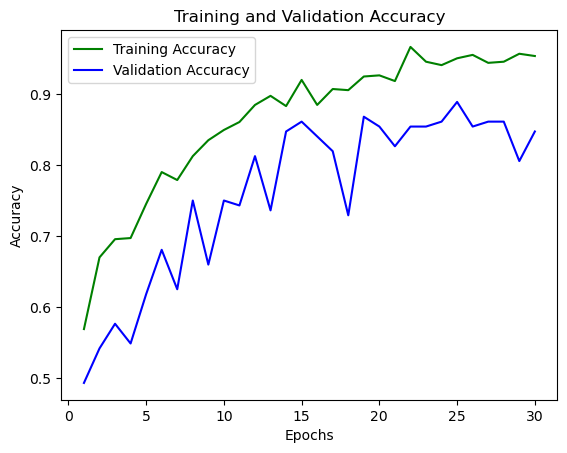

In [30]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

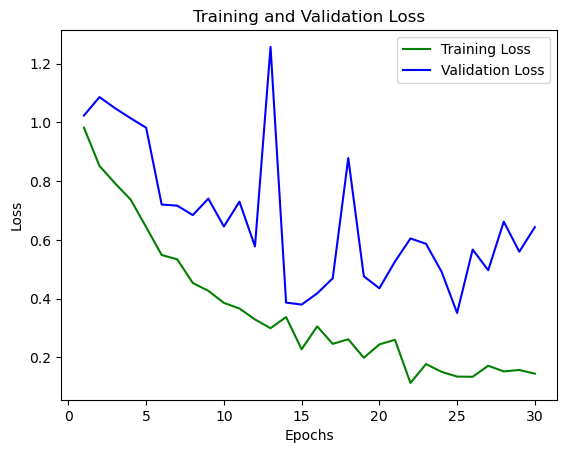

In [31]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#PREDICTION ON A SINGLE IMAGE

1/1 [==============================] - 1s 1s/step
1


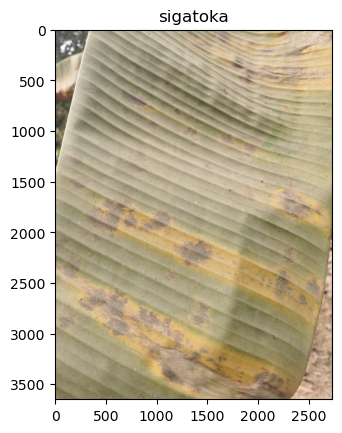

In [34]:
test_image=r'C:\Python310\projects\BANANAdataset\train\pestalotiopsis\IMG_20210309_124145.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','sigatoka','cordana','pestalotiopsis']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()
